Looking for some examples on how to use docTR for OCR-related tasks? You've come to the right place 😀

# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release, and developer mode.

In [ ]:
# Install the most up-to-date version from GitHub

# TensorFlow
# !pip install python-doctr[tf,viz]@git+https://github.com/mindee/doctr.git

# PyTorch
# First we have to uninstall the preinstalled tensorflow version if we want to work with PyTorch as backend
# because the env variables USE_TORCH=1 / USE_TF=1 doesn't have an effect in Colab
!pip uninstall -y tensorflow
!pip install python-doctr[torch,viz]@git+https://github.com/mindee/doctr.git

# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

Let's take care of all the imports directly

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

For the next steps, we will need a proper PDF document that will be used to showcase the library features

In [4]:
# Read the file
doc = DocumentFile.from_pdf("BRE-03.pdf")
print(f"Number of pages: {len(doc)}")

Number of pages: 1


docTR is, under the hood, running Deep Learning models to perform the different tasks it supports. Those models were built and trained with very popular frameworks for maximum compatibility (you will be pleased to know that you can switch from [PyTorch](https://pytorch.org/) to [TensorFlow](https://www.tensorflow.org/) without noticing any difference for you). By default, our high-level API sets the best default values so that you get high performing models without having to know anything about it. All of this is wrapper in a `Predictor` object, which will take care of pre-processing, model inference and post-processing for you ⚡

Let's instantiate one!

In [5]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

  0%|          | 0/65814772 [00:00<?, ?it/s]

  0%|          | 0/63303144 [00:00<?, ?it/s]

By default, PyTorch model provides a nice visual description of a model, which is handy when it comes to debugging or knowing what you just created. We also added a similar feature for TensorFlow backend so that you don't miss on this nice assistance.

Let's dive into this model 🕵

In [ ]:
# Display the architecture
print(predictor)

Here we are inspecting the most complex (and high-level) object of docTR API: an OCR predictor. Since docTR achieves Optical Character Recognition by first localizing textual elements (Text Detection), then extracting the corresponding text from each location (Text Recognition), the OCR Predictor wraps two sub-predictors: one for text detection, and the other for text recognition.

## Basic inference

It looks quite complex, isn't it?
Well that will not prevent you from easily get nice results. See for yourself:

In [6]:
result = predictor(doc)

## Prediction visualization

If you rightfully prefer to see the results with your eyes, docTR includes a few visualization features. We will first overlay our predictions on the original document:

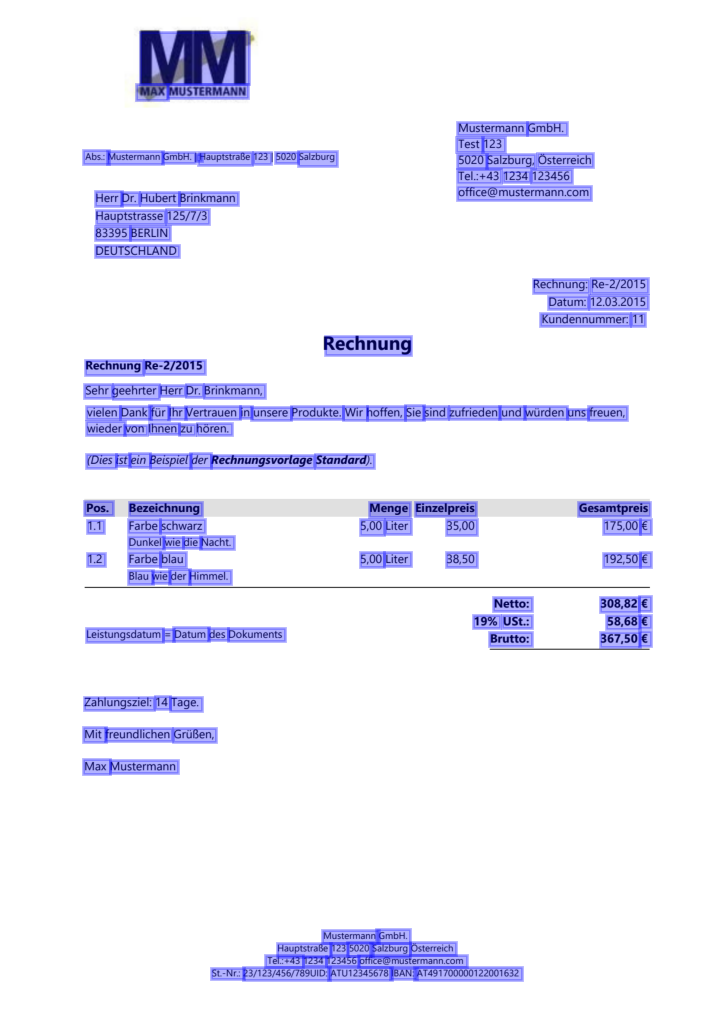

In [7]:
result.show()

[link text](https://)Looks accurate!
But we can go further: if the extracted information is correctly structured, we should be able to recreate the page entirely. So let's do this 🎨

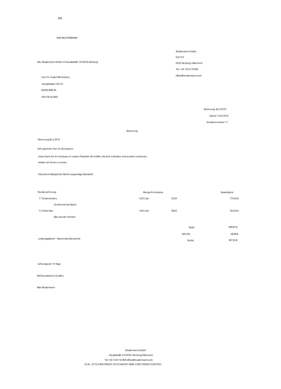

In [8]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [9]:
# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (1684, 1190), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((np.float64(0.10337775735294119), np.float64(0.0224609375)), (np.float64(0.9062959558823529), np.float64(0.970703125))), 'objectness_score': 0.7718095036459641, 'lines': [{'geometry': ((np.float64(0.183531381302521), np.float64(0.0224609375)), (np.float64(0.3383107930672269), np.float64(0.0751953125))), 'objectness_score': 0.8901689052581787, 'words': [{'value': 'MM', 'confidence': 0.9451125264167786, 'geometry': ((np.float64(0.183531381302521), np.float64(0.0224609375)), (np.float64(0.3383107930672269), np.float64(0.0751953125))), 'objectness_score': 0.8901689052581787, 'crop_orientation': {'value': 0, 'confidence': None}}]}, {'geometry': ((np.float64(0.1780035451680672), np.float64(0.0751953125)), (np.float64(0.33692883403361346), np.float64(0.0908203125))), 'objectness_score': 0.7840720415115356, 'words':

Or if you only need the extracted plain text

In [10]:
string_result = result.render()
print(string_result)

MM
MAX MUSTERMANN
Mustermann GmbH.
Test 123
Abs.: Mustermann GmbH. H HauptstraBe 123 5020 Salzburg
5020 Salzburg, Osterreich
Tel.:+43 1234 123456
Herr Dr. Hubert Brinkmann
office@mustermann.com
Hauptstrasse 125/7/3
83395 BERLIN
DEUTSCHLAND
Rechnung: Re-2/2015
Datum: 12.03.2015
Kundennummer: 11
Rechnung
Rechnung Re-2/2015
Sehr geehrter Herr Dr. Brinkmann,
vielen Dank fur Ihr Vertrauen in unsere Produkte. Wir hoffen, Sie sind zufrieden und wurden uns freuen,
wieder von Ihnen zu horen.
(Dies ist ein Beispiel der Rechnungsvorlage Standard).
Pos. Bezeichnung
Menge Einzelpreis
Gesamtpreis
1.1 Farbe schwarz
5,00 Liter
35,00
175,00 €
Dunkel wie die Nacht.
1.2 Farbe blau
5,00 Liter
38,50
192,50 €
Blau wie der Himmel.
Netto:
308,82 €
19% USt.:
58,68 €
Leistungsdatum = Datum des Dokuments
Brutto:
367,50 €
Zahlungsziel: 14 Tage.
Mit freundlichen GruBen,
Max Mustermann
Mustermann GmbH.
HauptstraBe 123 5020: Salzburg Osterreich
Tel:+43 1234 123456 office@mustermann.com
St.-Nr.: 23/123/456/789UID: AT